<a href="https://colab.research.google.com/github/Prajith3/SIT719/blob/main/Copy_of_RF_on_IoT_Combined_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest(RF) on IoT Combined Dataset**

****Importing libraries****

In [21]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
#warnings.filterwarnings('always')

**Upload File**

In [22]:
#uploaded = files.upload()

**Importing the Dataset**

In [23]:
dataset = pd.read_csv('Processed_Combined_IoT_dataset.csv')

**Exploratory Data Analysis**

In [24]:
dataset.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status,label
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0


In [25]:
print(dataset.shape)

(401119, 18)


In [26]:
print(list(dataset.columns))

['FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil', 'current_temperature', 'door_state', 'fridge_temperature', 'humidity', 'latitude', 'light_status', 'longitude', 'motion_status', 'pressure', 'sphone_signal', 'temp_condition', 'temperature', 'thermostat_status', 'label']


In [27]:
target_cols=list(dataset.columns[-1:])
target_cols

['label']

In [28]:
feature_cols= list(dataset.columns[:-1])
feature_cols

['FC1_Read_Input_Register',
 'FC2_Read_Discrete_Value',
 'FC3_Read_Holding_Register',
 'FC4_Read_Coil',
 'current_temperature',
 'door_state',
 'fridge_temperature',
 'humidity',
 'latitude',
 'light_status',
 'longitude',
 'motion_status',
 'pressure',
 'sphone_signal',
 'temp_condition',
 'temperature',
 'thermostat_status']

**Split Dataset**

In [29]:
#split dataset in features and target variable
X = dataset.drop('label', axis=1) # Features
y = dataset['label'] # Target variable

In [30]:
X.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1


In [31]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

**Splitting Data**

In [32]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [33]:
# Check the shape of all of these
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (280783, 17)
X_test shape  is :  (120336, 17)
y_train shape is :  (280783,)
y_test shape is  :  (120336,)


**Building Model**

In [34]:
#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [35]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

**Evaluating Model**

In [36]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[69920  3575]
 [12092 34749]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     73495
           1       0.91      0.74      0.82     46841

    accuracy                           0.87    120336
   macro avg       0.88      0.85      0.86    120336
weighted avg       0.87      0.87      0.87    120336



In [37]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time)

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.8698062092806808
Precision: 0.9067164179104478
Recall: 0.7418500885975962
F1 Score: 0.8160394528268656
Mean Absolute Error: 0.13019379071931925
Cohens kappa: 0.7168424996463489
ROC AUC: 0.8466036618918316
Train Time(s):  67.12574144399878
Test Time(s):  3.330456495999897


In [38]:
import timeit
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import warnings

# Load the dataset
dataset = pd.read_csv('Processed_Combined_IoT_dataset.csv')

# Split dataset into features and target variable
X = dataset.drop('label', axis=1)  # Features
y = dataset['label']  # Target variable

# Split dataset into a 70% training set and a 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Define a dictionary of classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'k-NN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}

# Loop through classifiers
for clf_name, clf in classifiers.items():
    print(f"Training and evaluating {clf_name}...")

    # Calculate start time for training
    start = timeit.default_timer()

    # Train the model using the training set
    clf.fit(X_train, y_train)

    # Calculate stop time for training
    stop = timeit.default_timer()
    train_time = stop - start

    # Calculate start time for testing
    start = timeit.default_timer()

    # Predict with the trained model
    y_pred = clf.predict(X_test)

    # Calculate stop time for testing
    stop = timeit.default_timer()
    test_time = stop - start

    # Print confusion matrix and classification report
    print(f"Confusion Matrix ({clf_name}):\n", confusion_matrix(y_test, y_pred))
    print(f"Classification Report ({clf_name}):\n", classification_report(y_test, y_pred))

    # Model Accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"Accuracy ({clf_name}): {accuracy}")

    # Model Precision
    precision = metrics.precision_score(y_test, y_pred)
    print(f"Precision ({clf_name}): {precision}")

    # Model Recall
    recall = metrics.recall_score(y_test, y_pred)
    print(f"Recall ({clf_name}): {recall}")

    # F1 Score
    f1_score = metrics.f1_score(y_test, y_pred)
    print(f"F1 Score ({clf_name}): {f1_score}")

    # Mean Absolute Error
    mae = metrics.mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error ({clf_name}): {mae}")

    # Cohen's kappa
    kappa = metrics.cohen_kappa_score(y_test, y_pred)
    print(f"Cohens kappa ({clf_name}): {kappa}")

    # ROC AUC (if applicable)
    if clf_name != 'SVM':
        roc_auc = metrics.roc_auc_score(y_test, y_pred)
        print(f"ROC AUC ({clf_name}): {roc_auc}")

    # Train time
    print(f'Train Time ({clf_name}) (s): {train_time}')

    # Test time
    print(f'Test Time ({clf_name}) (s): {test_time}')
    print()

Training and evaluating Decision Tree...
Confusion Matrix (Decision Tree):
 [[69376  4119]
 [12119 34722]]
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.85      0.94      0.90     73495
           1       0.89      0.74      0.81     46841

    accuracy                           0.87    120336
   macro avg       0.87      0.84      0.85    120336
weighted avg       0.87      0.87      0.86    120336

Accuracy (Decision Tree): 0.8650611620795107
Precision (Decision Tree): 0.893952266934425
Recall (Decision Tree): 0.7412736705023377
F1 Score (Decision Tree): 0.8104852827898509
Mean Absolute Error (Decision Tree): 0.1349388379204893
Cohens kappa (Decision Tree): 0.7071286769059011
ROC AUC (Decision Tree): 0.8426145208080095
Train Time (Decision Tree) (s): 2.746584974000143
Test Time (Decision Tree) (s): 0.04131598200001463

Training and evaluating Logistic Regression...
Confusion Matrix (Logistic Regression):
 [[71660  

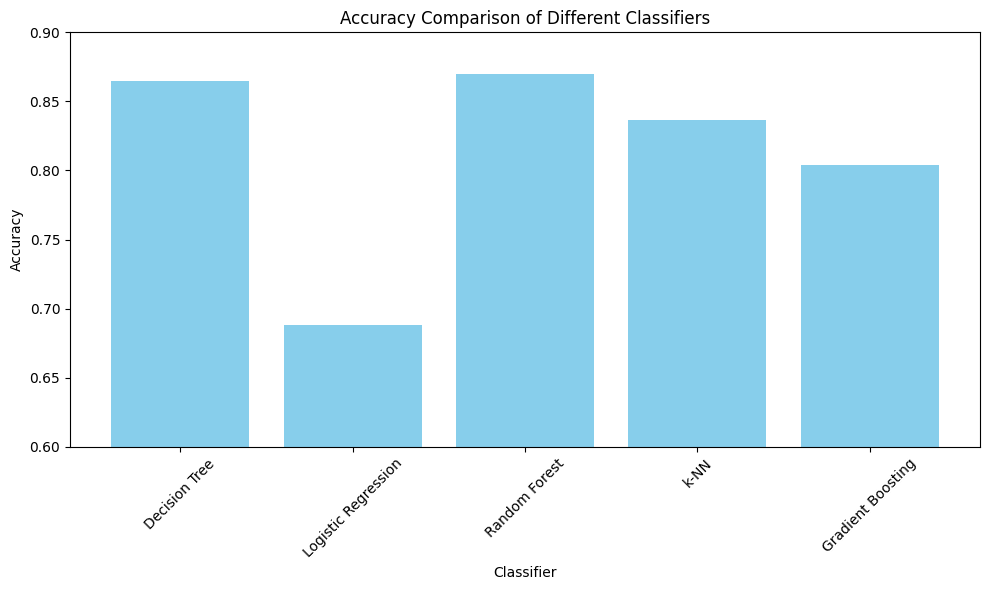

In [39]:
import matplotlib.pyplot as plt

# Define the classifiers and their accuracy scores
classifiers = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'k-NN', 'Gradient Boosting']
accuracy_scores = [0.8649, 0.6882, 0.8700, 0.8363, 0.8042]  # Replace with your actual accuracy scores

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracy_scores, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.ylim(0.6, 0.9)  # Set the y-axis range if needed
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


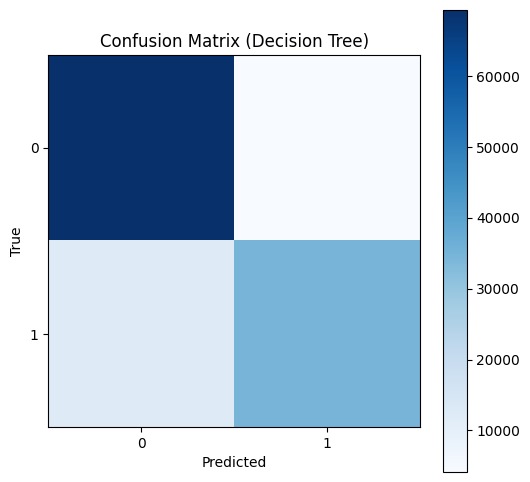

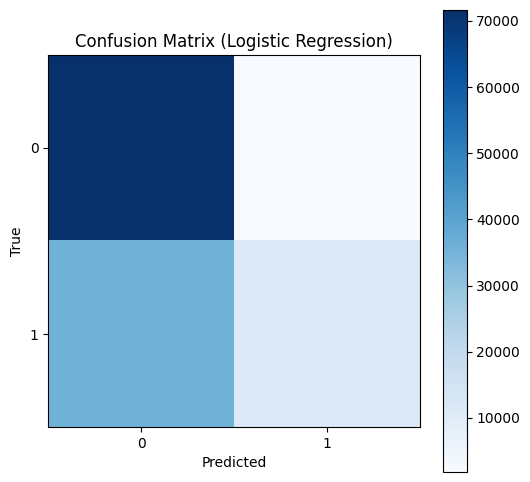

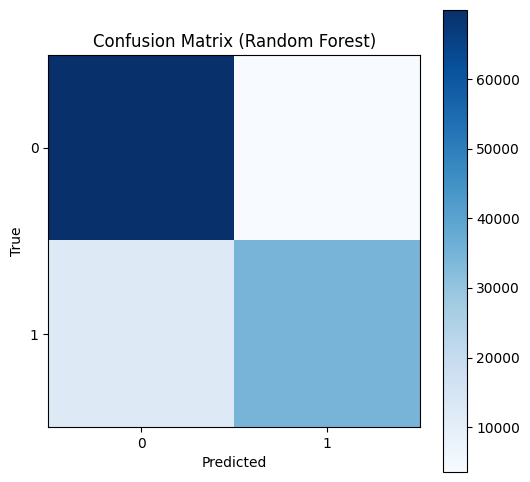

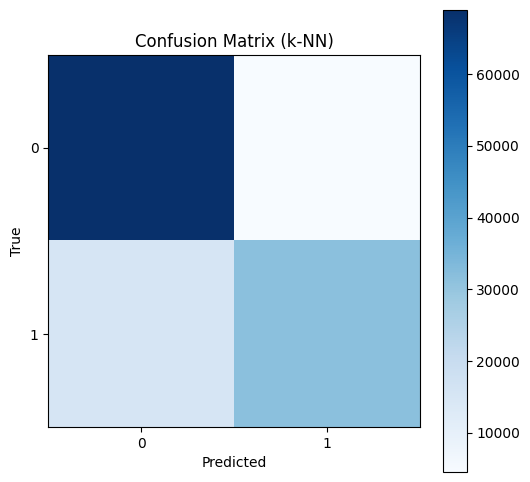

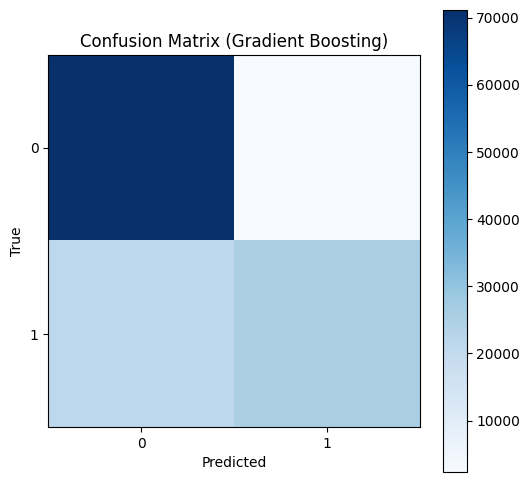

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define a dictionary of classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'k-NN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}

# Loop through classifiers
for clf_name, clf in classifiers.items():
    # Train the model using the training set
    clf.fit(X_train, y_train)

    # Predict with the trained model
    y_pred = clf.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix ({clf_name})")
    plt.colorbar()
    plt.xticks([0, 1], ["0", "1"])
    plt.yticks([0, 1], ["0", "1"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
